# Multivariate Visualizations

Up until now, we’ve discussed how to visualize single-feature distributions. Now, let’s understand how to visualize the relationship between more than one features.

We will continue to use the World Bank dataset, which contains information from 2015/16 about countries around the world. We will use the same features as before: GDP per capita, life expectancy, and population. 

In [1]:
import pandas as pd 
import seaborn as sns 
from matplotlib import pyplot as plt

sns.set_style('whitegrid')

data = pd.read_csv('https://raw.githubusercontent.com/fahadsultan/datascience_ml/main/data/world_bank.csv', index_col=0)
data.head()

,Continent,Country,Primary completion rate: Male: % of relevant age group: 2015,Primary completion rate: Female: % of relevant age group: 2015,Lower secondary completion rate: Male: % of relevant age group: 2015,Lower secondary completion rate: Female: % of relevant age group: 2015,Youth literacy rate: Male: % of ages 15-24: 2005-14,Youth literacy rate: Female: % of ages 15-24: 2005-14,Adult literacy rate: Male: % ages 15 and older: 2005-14,Adult literacy rate: Female: % ages 15 and older: 2005-14,...,Access to improved sanitation facilities: % of population: 1990,Access to improved sanitation facilities: % of population: 2015,Child immunization rate: Measles: % of children ages 12-23 months: 2015,Child immunization rate: DTP3: % of children ages 12-23 months: 2015,Children with acute respiratory infection taken to health provider: % of children under age 5 with ARI: 2009-2016,Children with diarrhea who received oral rehydration and continuous feeding: % of children under age 5 with diarrhea: 2009-2016,Children sleeping under treated bed nets: % of children under age 5: 2009-2016,Children with fever receiving antimalarial drugs: % of children under age 5 with fever: 2009-2016,Tuberculosis: Treatment success rate: % of new cases: 2014,Tuberculosis: Cases detection rate: % of new estimated cases: 2015
0,Africa,Algeria,106.0,105.0,68.0,85.0,96.0,92.0,83.0,68.0,...,80.0,88.0,95.0,95.0,66.0,42.0,NaN,NaN,88.0,80.0
1,Africa,Angola,NaN,NaN,NaN,NaN,79.0,67.0,82.0,60.0,...,22.0,52.0,55.0,64.0,NaN,NaN,25.9,28.3,34.0,64.0
2,Africa,Benin,83.0,73.0,50.0,37.0,55.0,31.0,41.0,18.0,...,7.0,20.0,75.0,79.0,23.0,33.0,72.7,25.9,89.0,61.0
3,Africa,Botswana,98.0,101.0,86.0,87.0,96.0,99.0,87.0,89.0,...,39.0,63.0,97.0,95.0,NaN,NaN,NaN,NaN,77.0,62.0
5,Africa,Burundi,58.0,66.0,35.0,30.0,90.0,88.0,89.0,85.0,...,42.0,48.0,93.0,94.0,55.0,43.0,53.8,25.4,91.0,51.0


## Distribution of a numeric feature, across categorical features

Let’s start by visualizing the distribution of a numeric feature, across the categories defined by a categorical feature. 

### Overlaid Histograms

We can use a histogram to visualize the distribution of a numeric variable. To visualize how this distribution differs between the groups created by another categorical variable, we can create a histogram for each group separately.

In order to create overlaid histograms, we will continue to use `sns.histplot`. The only addition we need to make is to use the **`hue` argument to specify the categorical feature** that defines the groups.

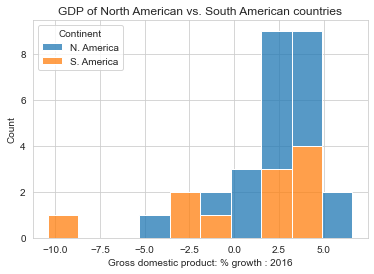

In [2]:
americas = data[data['Continent'].apply(lambda x: "America" in x)]

col = "Gross domestic product: % growth : 2016"

ax = sns.histplot(data = americas, x = col, hue="Continent",  multiple="stack");

ax.set(title="GDP of North American vs. South American countries");

Note the use of the **`hue`** argument to `histplot`. It adds a new dimension to the plot, by coloring the bars according to the value of the categorical feature.

`multiple="stack"` is an optional argument and is used to improve the visibility when  bars are stacked on top of each other. 


These visualizations are arguably the most ubiquitous in science. The canonical version of overlaid histograms are where a new drug is tested against a placebo, and the distribution of some outcome (e.g. blood pressure) is plotted for the placebo group and the drug group.

Most common statistical tests are designed to answer the question: “Do these two groups differ?” This question is answered by comparing the distributions of the two groups.

### Side-by-side box plots

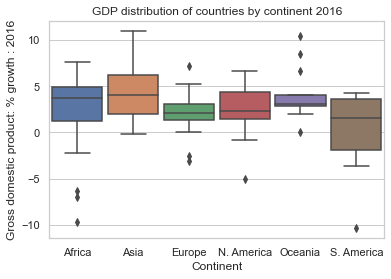

In [112]:
col = "Gross domestic product: % growth : 2016"

ax = sns.boxplot(data = data, y = col, x="Continent", width=0.9);

ax.set(title="GDP distribution of countries by continent 2016");

## Visualizing Relationships


#### Scatter Plots

Scatter plots are one of the most useful tools in representing the relationship between two numerical features. They are particularly important in gauging the strength (correlation) of the relationship between features. Knowledge of these relationships can then motivate decisions in our modeling process.

In Matplotlib, we use the function plt.scatter to generate a scatter plot. Notice that unlike our examples of plotting single-variable distributions, now we specify sequences of values to be plotted along the x axis and the y axis.

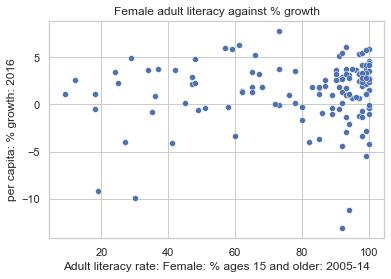

In [113]:
wb = pd.read_csv('https://raw.githubusercontent.com/fahadsultan/datascience_ml/main/data/world_bank.csv', index_col=0)

ax = sns.scatterplot(data = wb, \
                     x ='Adult literacy rate: Female: % ages 15 and older: 2005-14', \
                     y = "per capita: % growth: 2016")

ax.set(title="Female adult literacy against % growth");

In Seaborn, we call the function sns.scatterplot. We use the x and y parameters to indicate the values to be plotted along the x and y axes, respectively. By using the hue parameter, we can specify a third variable to be used for coloring each scatter point.

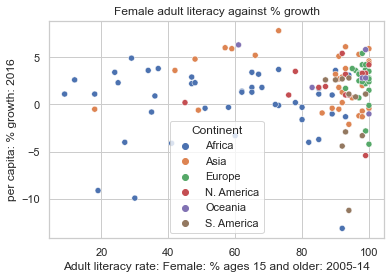

In [36]:
sns.scatterplot(data = wb, y = "per capita: % growth: 2016", \
               x = "Adult literacy rate: Female: % ages 15 and older: 2005-14", 
               hue = "Continent")

plt.title("Female adult literacy against % growth");

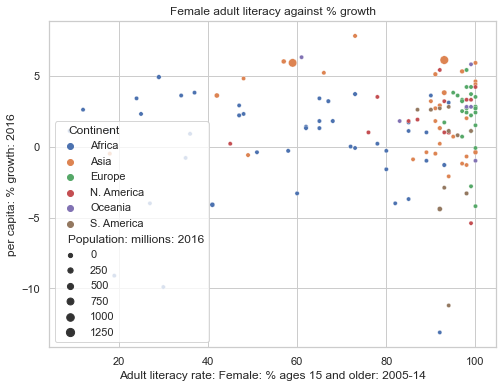

In [61]:
ax = sns.scatterplot(data = wb, \
                    y = "per capita: % growth: 2016", \
                    x = "Adult literacy rate: Female: % ages 15 and older: 2005-14", 
                    hue = "Continent", \
                    size="Population: millions: 2016")

ax.figure.set_size_inches(8, 6);

ax.set(title="Female adult literacy against % growth");

### Joint Plots

`sns.jointplot` creates a visualization with three components: a scatter plot, a histogram of the distribution of x values, and a histogram of the distribution of y values.

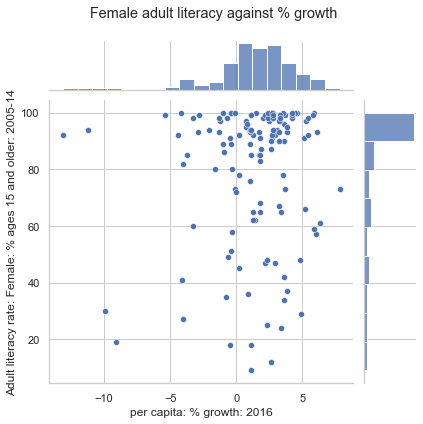

In [65]:
sns.jointplot(data = wb, x = "per capita: % growth: 2016", \
           y = "Adult literacy rate: Female: % ages 15 and older: 2005-14")

# plt.suptitle allows us to shift the title up so it does not overlap with the histogram
plt.suptitle("Female adult literacy against % growth")
plt.subplots_adjust(top=0.9);

### Hex plots

For datasets with a very large number of datapoints, jittering is unlikely to fully resolve the issue of overplotting. In these cases, we can attempt to visualize our data by its density, rather than displaying each individual datapoint.

**Hex plots** can be thought of as a two dimensional histograms that shows the joint distribution between two variables. This is particularly useful working with very dense data. In a hex plot, the x-y plane is binned into hexagons. Hexagons that are darker in color indicate a greater density of data – that is, there are more datapoints that lie in the region enclosed by the hexagon.

We can generate a hex plot using `sns.jointplot` modified with the kind parameter.

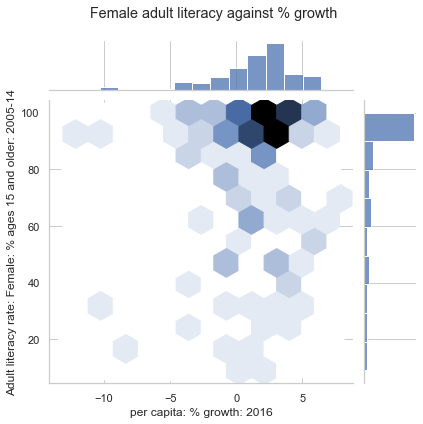

In [94]:
sns.jointplot(data = wb, x = "per capita: % growth: 2016", \
              y = "Adult literacy rate: Female: % ages 15 and older: 2005-14", \
              kind = "hex")

# plt.suptitle allows us to shift the title up so it does not overlap with the histogram
plt.suptitle("Female adult literacy against % growth")
plt.subplots_adjust(top=0.9);

## Temporal Data: Line Plot

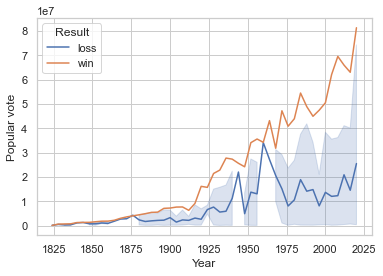

In [104]:
data = pd.read_csv('https://raw.githubusercontent.com/fahadsultan/datascience_ml/main/data/elections.csv')

sns.lineplot(data = data, x = "Year", y = "Popular vote", hue='Result');

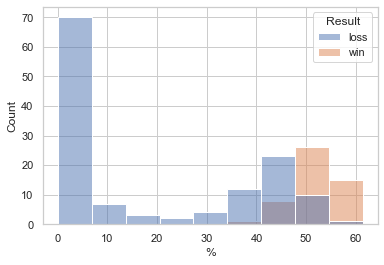

In [93]:
sns.histplot(data = data, x = "%", hue='Result');